In [1]:
!nvidia-smi

Tue Mar  8 16:21:45 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [58]:
!rm -rf /content/Augmented/angry
!mkdir /content/Augmented/angry

In [ ]:
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from matplotlib import pyplot
import os
import uuid

path = "/content/EmotionsDataset_Splitted/data/test/happy/"
path_augmented = "/content/Augmented/happy/"

images = os.listdir(path)

# Brightness

for img in images:
	# load the image
	image = load_img(path+str(img), target_size=(96, 96))
	# convert to numpy array
	data = img_to_array(image)
	# expand dimension to one sample
	samples = expand_dims(data, 0)
	# create image data augmentation generator
	datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
	# prepare iterator
	it = datagen.flow(samples, batch_size=1)

	img_id = 0
	# generate samples and plot
	for _ in range(8):
		# generate batch of images
		batch = it.next()
		# convert to unsigned integers for viewing
		image = batch[0].astype('uint8')
		img_id += 1
		photo_path = path_augmented+f"{uuid.uuid1()}.jpg"
		image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
		cv2.imwrite(photo_path, image)
		print("Saved:", photo_path)

# Horizontal Flip

for img in images:
	# load the image
	image = load_img(path+str(img), target_size=(96, 96))
	# convert to numpy array
	data = img_to_array(image)
	# expand dimension to one sample
	samples = expand_dims(data, 0)
	# create image data augmentation generator
	datagen = ImageDataGenerator(horizontal_flip=True)
	# prepare iterator
	it = datagen.flow(samples, batch_size=1)

	img_id = 0
	# generate samples and plot
	for _ in range(8):
		# generate batch of images
		batch = it.next()
		# convert to unsigned integers for viewing
		image = batch[0].astype('uint8')
		img_id += 1
		photo_path = path_augmented+f"{uuid.uuid1()}.jpg"
		image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
		cv2.imwrite(photo_path, image)
		print("Saved:", photo_path)


# Vertical Flip

for img in images:
	# load the image
	image = load_img(path+str(img), target_size=(96, 96))
	# convert to numpy array
	data = img_to_array(image)
	# expand dimension to one sample
	samples = expand_dims(data, 0)
	# create image data augmentation generator
	datagen = ImageDataGenerator(vertical_flip=True)
	# prepare iterator
	it = datagen.flow(samples, batch_size=1)

	img_id = 0
	# generate samples and plot
	for _ in range(8):
		# generate batch of images
		batch = it.next()
		# convert to unsigned integers for viewing
		image = batch[0].astype('uint8')
		img_id += 1
		photo_path = path_augmented+f"{uuid.uuid1()}.jpg"
		image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
		cv2.imwrite(photo_path, image)
		print("Saved:", photo_path)


# Rotation

for img in images:
	# load the image
	image = load_img(path+str(img), target_size=(96, 96))
	# convert to numpy array
	data = img_to_array(image)
	# expand dimension to one sample
	samples = expand_dims(data, 0)
	# create image data augmentation generator
	datagen = ImageDataGenerator(rotation_range=90)
	# prepare iterator
	it = datagen.flow(samples, batch_size=1)

	img_id = 0
	# generate samples and plot
	for _ in range(8):
		# generate batch of images
		batch = it.next()
		# convert to unsigned integers for viewing
		image = batch[0].astype('uint8')
		img_id += 1
		photo_path = path_augmented+f"{uuid.uuid1()}.jpg"
		image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
		cv2.imwrite(photo_path, image)
		print("Saved:", photo_path)


# Zoom

for img in images:
	# load the image
	image = load_img(path+str(img), target_size=(96, 96))
	# convert to numpy array
	data = img_to_array(image)
	# expand dimension to one sample
	samples = expand_dims(data, 0)
	# create image data augmentation generator
	datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
	# prepare iterator
	it = datagen.flow(samples, batch_size=1)

	img_id = 0
	# generate samples and plot
	for _ in range(8):
		# generate batch of images
		batch = it.next()
		# convert to unsigned integers for viewing
		image = batch[0].astype('uint8')
		img_id += 1
		photo_path = path_augmented+f"{uuid.uuid1()}.jpg"
		image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
		cv2.imwrite(photo_path, image)
		print("Saved:", photo_path)

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [41]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [42]:
!kaggle datasets download -d muhammadhananasghar/human-emotions-datasethes

 96% 297M/309M [00:03<00:00, 83.8MB/s]
100% 309M/309M [00:03<00:00, 102MB/s] 


In [ ]:
!unzip *.zip && rm -rf *.zip

In [1]:
import tensorflow as tf

In [2]:
IMG_WIDTH = 64
IMG_HEIGHT = 64
BATCH_SIZE = 256
EPOCHS = 50

In [67]:
!pip install split-folders


import splitfolders
splitfolders.ratio('Augmented', output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 145165 files [00:31, 4561.43 files/s]


In [70]:
!rm -rf "/content/output/train/.ipynb_checkpoints"
!rm -rf "/content/output/test/.ipynb_checkpoints"
!rm -rf "/content/output/val/.ipynb_checkpoints"

In [3]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=45,
                                   horizontal_flip=True,
                                   vertical_flip=True)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory("/content/output/train",
                                       target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                batch_size=BATCH_SIZE,
                                     class_mode='categorical')

test_set = test_datagen.flow_from_directory("/content/output/test",
                                       target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                batch_size=BATCH_SIZE,
                                     class_mode='categorical')

val_set = test_datagen.flow_from_directory("/content/output/val",
                                       target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                batch_size=BATCH_SIZE,
                                     class_mode='categorical')

Found 116132 images belonging to 3 classes.
Found 14517 images belonging to 3 classes.
Found 14516 images belonging to 3 classes.


In [4]:
class_names = training_set.class_indices
num_classes =len(class_names)
print(class_names, num_classes)

{'angry': 0, 'happy': 1, 'sad': 2} 3


In [5]:
model = tf.keras.models.Sequential([

  tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=512, activation="relu"),
  tf.keras.layers.Dropout(rate=0.1),
  tf.keras.layers.Dense(units=512, activation="relu"),
  tf.keras.layers.Dense(units=num_classes, activation="softmax")
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [7]:
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [8]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("model.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose = 1)

earlystop = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                         min_delta=0,
                         patience=3,
                         verbose=1,
                         restore_best_weights=True)

callbacks = [earlystop, checkpoint]

In [9]:
history = model.fit(
  training_set,
  validation_data = test_set,
  epochs = EPOCHS,
  callbacks = callbacks,
)

Epoch 1/50
454/454 [==============================] - ETA: 0s - loss: 0.9758 - accuracy: 0.5286
Epoch 1: val_loss improved from inf to 0.90674, saving model to model.h5
454/454 [==============================] - 233s 506ms/step - loss: 0.9758 - accuracy: 0.5286 - val_loss: 0.9067 - val_accuracy: 0.5634
Epoch 2/50
454/454 [==============================] - ETA: 0s - loss: 0.8758 - accuracy: 0.5845
Epoch 2: val_loss improved from 0.90674 to 0.76594, saving model to model.h5
454/454 [==============================] - 230s 507ms/step - loss: 0.8758 - accuracy: 0.5845 - val_loss: 0.7659 - val_accuracy: 0.6534
Epoch 3/50
454/454 [==============================] - ETA: 0s - loss: 0.7766 - accuracy: 0.6472
Epoch 3: val_loss improved from 0.76594 to 0.67144, saving model to model.h5
454/454 [==============================] - 229s 505ms/step - loss: 0.7766 - accuracy: 0.6472 - val_loss: 0.6714 - val_accuracy: 0.7116
Epoch 4/50
454/454 [==============================] - ETA: 0s - loss: 0.7071 - a

In [10]:
model.evaluate(val_set)

57/57 [==============================] - 10s 167ms/step - loss: 0.2703 - accuracy: 0.8813


[0.27032551169395447, 0.8813033699989319]

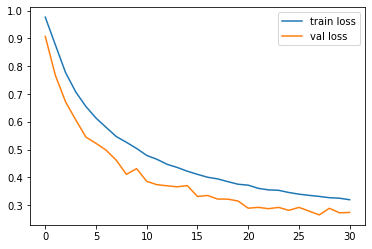

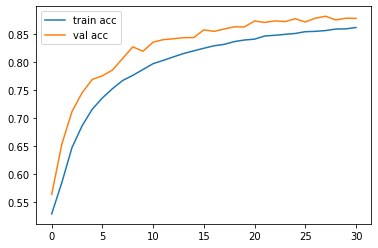

In [11]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [13]:
import numpy as np

test_img, test_lbl = test_set.__next__()
predictions=model.predict(test_img)

In [14]:
predictions = np.argmax(predictions, axis=1)
predictions

array([2, 1, 0, 2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 0, 2, 0,
       2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0, 1, 1, 0, 2,
       0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0,
       0, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 2,
       1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 1, 0, 1, 1, 1,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 2, 0, 0, 2, 0, 2, 1, 0])

In [16]:
test_labels = np.argmax(test_lbl, axis=1)

In [17]:
test_labels

array([2, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 2, 0,
       1, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0,
       2, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0, 1, 0, 0, 2,
       0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0,
       0, 2, 2, 1, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 2, 0, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0,
       0, 0, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 2, 2, 1, 1, 2,
       2, 2, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0,
       2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 2, 1, 2, 0, 1, 0, 1, 1, 1,
       1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 1, 2, 0, 0, 2, 0, 2, 1, 2])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions)

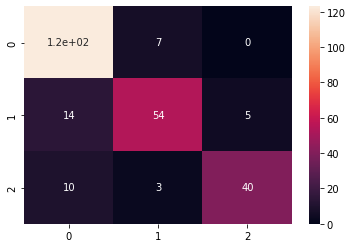

In [20]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [21]:
import tensorflow as tf

model =tf.keras.models.load_model("/content/model.h5")

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("model_em_.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpdye55n2w/assets


11005660

Implemented By Muhammad Hanan Asghar